In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def cv_show(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    
def cv2_show(img,name):
    cv2.imshow(name,img)
    cv2.waitKey()
    cv2.destroyAllWindows()

In [2]:
template = cv2.imread('01_Picture/12_Face.jpg',0)  # 0 表示以灰度图方式读取
img = cv2.imread('01_Picture/13_Lena.jpg',0) 
h, w = template.shape[:2]
print(img.shape)
print(template.shape)

(263, 263)
(110, 85)


In [3]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
res = cv2.matchTemplate(img, template, cv2.TM_SQDIFF)
print(res.shape)
min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)
print(min_val,max_val,min_loc,max_loc)

(154, 179)
39168.0 74403584.0 (107, 89) (159, 62)


4


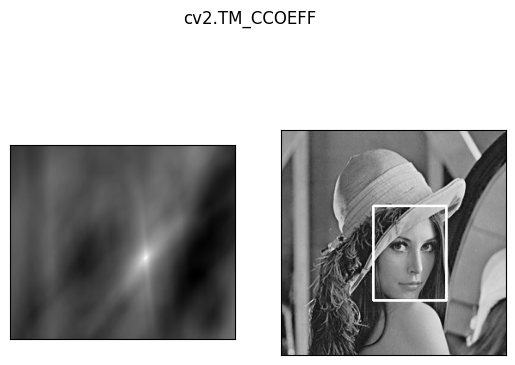

5


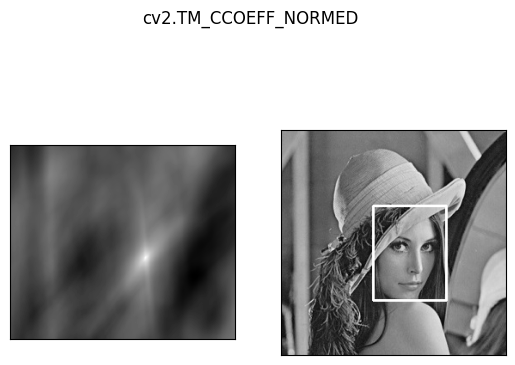

2


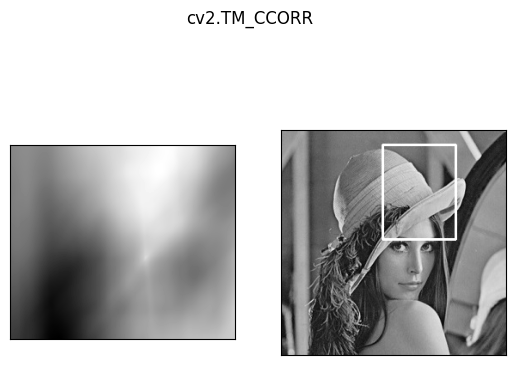

3


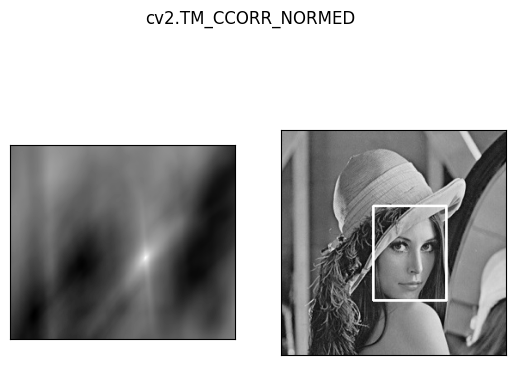

0


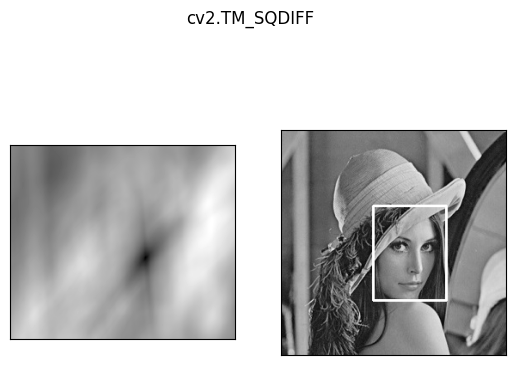

1


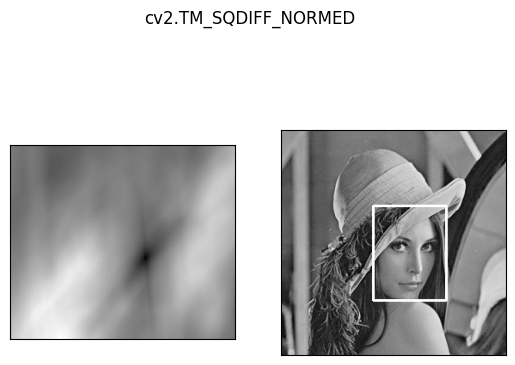

In [5]:
for meth in methods:
    img2 = img.copy()
    method = eval(meth)
    print(method)
    res = cv2.matchTemplate(img,template,method)
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)

    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0]+w,top_left[1]+h)

    cv2.rectangle(img2,top_left,bottom_right,255,2)

    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img2, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()


img_gray.shape： (207, 225)
template.shape： (27, 16)
res.shape: (181, 210)
type(loc): <class 'tuple'>
len(loc): 2
len(loc[0]) 120 len(loc[1]) 120
type(loc[0]) <class 'numpy.ndarray'> type(loc[1]) <class 'numpy.ndarray'>
loc[::-1] (array([ 69,  70,  83,  84,  97,  98, 111, 112, 125, 126,  68,  69,  70,
        82,  83,  84,  96,  97,  98, 110, 111, 112, 124, 125, 126,  68,
        69,  70,  82,  83,  84,  96,  97,  98, 110, 111, 112, 125, 126,
        69,  83,  97, 111, 125,  54,  55,  69,  83,  84,  97,  98, 111,
       112, 125, 126, 139, 140,  54,  55,  56,  68,  69,  70,  82,  83,
        84,  96,  97,  98, 110, 111, 112, 124, 125, 126, 138, 139, 140,
        54,  55,  56,  68,  69,  70,  82,  83,  84,  96,  97,  98, 110,
       111, 112, 124, 125, 126, 139, 140,  55,  69,  83,  97, 111, 125,
       139,  55,  55,  69,  83,  97, 111, 125, 139,  55,  69,  83,  97,
       111, 125, 139]), array([ 40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  41,  41,  41,
        41,  41,  41,  41,

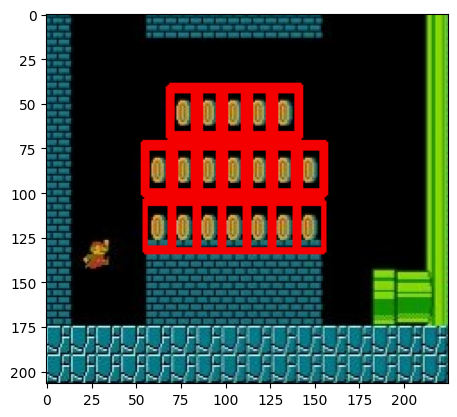

In [8]:
img_rgb = cv2.imread('01_Picture/14_Mario.jpg')
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)
print('img_gray.shape：',img_gray.shape)
template = cv2.imread('01_Picture/15_Mario_coin.jpg',0)
print('template.shape：',template.shape)
h, w = template.shape[:2]

res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
print('res.shape:', res.shape)
threshold = 0.8

loc = np.where(res >= threshold)
print('type(loc):',type(loc))
print('len(loc):',len(loc))
print('len(loc[0])',len(loc[0]),'len(loc[1])',len(loc[1]))
print('type(loc[0])',type(loc[0]),'type(loc[1])',type(loc[1]))
print("loc[::-1]",loc[::-1])

i = 0
for pt in zip(*loc[::-1]):
    bottom_right = (pt[0] + w, pt[1] + h)
    cv2.rectangle(img_rgb, pt, bottom_right, (0,0,244), 2)
    i = i + 1
print('i:',i)

cv_show(img_rgb)
